In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
review_df = pd.read_csv("../data/reviews.csv")

In [5]:
review_df.iloc[97,:]

source_type                                               Person
source_id                                                aecohen
edge_type                                            hasReviewed
target_type                                                 Game
target_id                                               126163.0
rating                                                       8.5
comment        This is a great game for those that want very ...
Name: 97, dtype: object

In [6]:
len(review_df['target_id'].unique())

60975

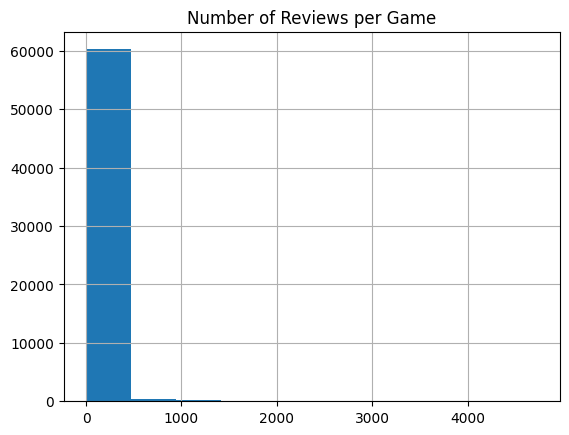

In [7]:
review_df['target_id'].value_counts().hist()
plt.title("Number of Reviews per Game")
plt.show()

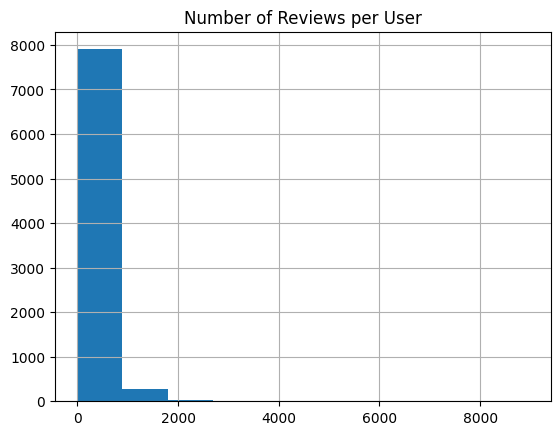

In [8]:
review_df['source_id'].value_counts().hist()
plt.title("Number of Reviews per User")
plt.show()

In [9]:
print(len(review_df))
review_df = review_df.drop_duplicates(subset=["source_id", "target_id"], keep='last')
print(len(review_df))


1876929
1800606


In [65]:
with open("../data/users_to_check.txt", 'w') as f:
    f.write(",".join(list(review_df['source_id'].value_counts()[review_df['source_id'].value_counts() < 100].sort_values(ascending=True).index)))

In [10]:
review_df.to_csv("../data/reviews.csv", index = False)

In [72]:
review_df['source_id'].value_counts()[review_df['source_id'].value_counts() < 2].sort_values(ascending=True).index.unique()

Index(['abdiqanimoh12', 'bdpluer', '418Y', 'aboredgaymer', 'abrahamj',
       'accidentaldesign', 'acookie', 'Adamandkate', 'Bad_Birb', 'Anharva',
       ...
       'Flundi', 'catladymn', 'allmonjoy1', 'amanshu', 'Annoraner', 'aconnor',
       'bcsssj', 'benfrohlich', 'CocoaCrow', 'abbojm02'],
      dtype='object', name='source_id', length=588)

In [30]:
review_df[review_df['source_id']=='dafair']

,source_type,source_id,edge_type,target_type,target_id,rating,comment
886944,Person,dafair,hasReviewed,Game,4282,3.0,Repackaged public domain game.
886945,Person,dafair,hasReviewed,Game,8257,9.0,"Several of the expansions are quite good, and ..."
886946,Person,dafair,hasReviewed,Game,7865,6.0,Game is great for my kids. I like it well enou...
886947,Person,dafair,hasReviewed,Game,22398,6.0,Another Excellent addition to the series. I li...
886948,Person,dafair,hasReviewed,Game,5867,6.0,Game is great for my kids. I like it well enou...
...,...,...,...,...,...,...,...
890917,Person,dafair,hasReviewed,Game,30139,8.0,"Not as necessary as the Petting Zoo Expansion,..."
890918,Person,dafair,hasReviewed,Game,3435,7.0,Fun little game. Reminds one of Duell a bit wh...
890919,Person,dafair,hasReviewed,Game,19998,6.0,NaN
890920,Person,dafair,hasReviewed,Game,181260,6.0,NaN


In [12]:
review_df[review_df['target_id']==3]

,source_type,source_id,edge_type,target_type,target_id,rating,comment
722,Person,1bez,hasReviewed,Game,3.0,8.0,NaN
2619,Person,AaronBE85,hasReviewed,Game,3.0,7.5,NaN
4432,Person,Agent_Pendergast,hasReviewed,Game,3.0,8.0,NaN
5126,Person,-Johnny-,hasReviewed,Game,3.0,4.0,NaN
7706,Person,adamtattoo,hasReviewed,Game,3.0,7.0,NaN
...,...,...,...,...,...,...,...
1864920,Person,altivolus,hasReviewed,Game,3.0,8.0,This game never disappoints me. It's not extre...
1865763,Person,Cbueck13,hasReviewed,Game,3.0,8.2,Not what I expected but still a deep and enter...
1868831,Person,A River Runs,hasReviewed,Game,3.0,8.0,One of my favorite Knizia games and my choice ...
1869128,Person,apertur4,hasReviewed,Game,3.0,7.5,NaN


In [20]:
review_df.groupby("target_id")['target_id'].value_counts().sort_values(ascending=False).describe()

count    60975.000000
mean        29.530234
std        133.553886
min          1.000000
25%          1.000000
50%          3.000000
75%         11.000000
max       4272.000000
Name: target_id, dtype: float64

In [21]:
review_df_processed = pd.read_csv("../data/processed/hasReviewedEdge_processed.csv")

In [30]:
review_df_processed.groupby("target_id")['weight'].count().sort_values(ascending=False).head(40)

target_id
30549.0     1605
822.0       1552
68448.0     1520
13.0        1458
36218.0     1359
9209.0      1330
148228.0    1329
178900.0    1317
230802.0    1316
167791.0    1303
70323.0     1271
173346.0    1239
84876.0     1230
2651.0      1223
266192.0    1220
40692.0     1219
169786.0    1216
31260.0     1199
129622.0    1198
3076.0      1192
28143.0     1165
163412.0    1161
34635.0     1131
110327.0    1112
14996.0     1072
50.0        1057
39856.0     1042
54043.0     1033
478.0       1018
124361.0    1014
98778.0      973
11.0         964
157354.0     961
126163.0     957
204583.0     944
193738.0     932
120677.0     929
172.0        923
147020.0     908
199561.0     907
Name: weight, dtype: int64

In [35]:
review_df_processed[review_df_processed['target_id']==155821].sort_values(by="weight")

,source_id,target_id,weight,comment
41951,assbinator,155821.0,0.055556,Boring... Too long... Uninteresting... You can...
284610,Craig D,155821.0,0.125000,NaN
173293,eddieb,155821.0,0.142857,An artistically unique work of art. Amazing ar...
96641,binge gamer,155821.0,0.200000,Nicely designed and produced with a system uni...
64064,bubblepipemedia,155821.0,0.222222,Wanted to love this. But every minute was wors...
...,...,...,...,...
263013,Fly Casual,155821.0,1.000000,"Beautiful art, and interesting drafing + area ..."
266846,Despermado,155821.0,1.000000,NaN
269444,glutealgeometry,155821.0,1.000000,I guess i've only played it 3 or 4 times over ...
317469,DJ_Murphy,155821.0,1.000000,NaN


In [36]:
review_df_processed[review_df_processed['target_id']==155821]['weight'].sum()

339.960189911327

In [37]:
1/339.9

0.0029420417769932335

In [39]:
1/10

0.1

In [45]:
review_df_processed[review_df_processed['source_id']==3]

,source_id,target_id,weight,comment


In [43]:
review_df_processed[review_df_processed['source_id']=='DJ_Murphy'].sort_values(by='weight', ascending=False)

,source_id,target_id,weight,comment
317435,DJ_Murphy,177736.0,1.000000,NaN
317429,DJ_Murphy,316554.0,1.000000,NaN
317579,DJ_Murphy,268864.0,1.000000,NaN
317395,DJ_Murphy,224517.0,1.000000,NaN
317390,DJ_Murphy,170216.0,1.000000,Rock n' roll
...,...,...,...,...
317514,DJ_Murphy,1234.0,0.166667,NaN
317417,DJ_Murphy,178900.0,0.166667,NaN
317410,DJ_Murphy,220520.0,0.166667,NaN
317448,DJ_Murphy,31481.0,0.166667,NaN


In [47]:
[int(id) if id.isnumeric() else id for id in ['Economic', '1255']]

['Economic', 1255]

In [2]:
game_data = pd.read_csv("../data/processed/Game_node_processed.csv")
game_data.head()

,id,rank,name,short_description,avg_rating,num_ratings,thumbnail_url,long_description,complexity_socre,year_published,image_url,min_play_time,max_play_time,expected_play_time
0,224517,1,Brass: Birmingham,"Build networks, grow industries, and navigate ...",8.62,37652,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,Brass: Birmingham is an economic strategy game...,3.8978,2018.0,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,60.0,120.0,120.0
1,161936,2,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,8.54,50208,https://cf.geekdo-images.com/-Qer2BBPG7qGGDu6K...,Pandemic Legacy is a co-operative campaign gam...,2.8321,2015.0,https://cf.geekdo-images.com/-Qer2BBPG7qGGDu6K...,60.0,60.0,60.0
2,174430,3,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,8.63,57778,https://cf.geekdo-images.com/sZYp_3BTDGjh2unaZ...,Gloomhaven is a game of Euro-inspired tactica...,3.8922,2017.0,https://cf.geekdo-images.com/sZYp_3BTDGjh2unaZ...,60.0,120.0,120.0
3,342942,4,Ark Nova,"Plan and build a modern, scientifically manage...",8.54,29090,https://cf.geekdo-images.com/SoU8p28Sk1s8MSvoM...,"In Ark Nova, you will plan and design a modern...",3.7222,2021.0,https://cf.geekdo-images.com/SoU8p28Sk1s8MSvoM...,90.0,150.0,150.0
4,233078,5,Twilight Imperium: Fourth Edition,"Build an intergalactic empire through trade, r...",8.62,20562,https://cf.geekdo-images.com/_Ppn5lssO5OaildSE...,Twilight Imperium (Fourth Edition) is a game o...,4.3034,2017.0,https://cf.geekdo-images.com/_Ppn5lssO5OaildSE...,240.0,480.0,480.0


In [3]:
game_data['complexity_socre'].isna().sum()/len(game_data)

0.5324298160696999

In [11]:
game_data[game_data['expected_play_time'].isna()]

,id,rank,name,short_description,avg_rating,num_ratings,thumbnail_url,long_description,complexity_socre,year_published,image_url,min_play_time,max_play_time,expected_play_time
88,231733,89,Obsession,"Renovate an estate, manage servants, and pursu...",8.19,7482,https://cf.geekdo-images.com/sy89BiuZXfbSnG7Ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,279537,94,The Search for Planet X,"Plan, scan, and theorize to find a new planet ...",8.02,8827,https://cf.geekdo-images.com/NItjtztEUAKOpaTWZ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,172386,96,Mombasa,Acquire shares of unique companies and propaga...,7.86,12747,https://cf.geekdo-images.com/VceWk5QVkgIp6rWDl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,146021,104,Eldritch Horror,An unknown Ancient One approaches the world—an...,7.76,34581,https://cf.geekdo-images.com/oxdsZKIX5_3ovDo38...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,203993,105,Lorenzo il Magnifico,Avoid excommunication and lead your family to ...,7.86,12772,https://cf.geekdo-images.com/8G6GkImjt0F_L5aYb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,28259,1885,Cutthroat Caverns,Plot carefully to strike the killing blow on m...,6.52,5005,https://cf.geekdo-images.com/38jw1p0ZcayPgLJuZ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,27225,1941,Bananagrams,Race to arrange your letter tiles into a cross...,6.38,10725,https://cf.geekdo-images.com/1QjYPI4bXx4OUMJPl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1027,249,1952,Lifeboats,Which boat will move? Who will be fed to the s...,6.58,3575,https://cf.geekdo-images.com/wcjYK7MwVpOf_V7zc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,176558,1958,Mafia de Cuba,Catch diamond thieves or steal from the mob bo...,6.53,4146,https://cf.geekdo-images.com/nvdogXld5bIr8uXIq...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
game_data['min_play_time'].isna().sum()/len(game_data)

0.5324298160696999

In [6]:
game_data['max_play_time'].isna().sum()/len(game_data)

0.5324298160696999

In [10]:
game_data['image_url'].isna().sum()/len(game_data)

0.5324298160696999